In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import gensim
from gensim.models import Word2Vec
import re

In [27]:
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())


In [28]:
data = """Alice, who was only twenty-three in this telling, opened the curious little door with a mixture of excitement and hesitation. To her surprise, it revealed a narrow passage, no more than ninety steps long, and scarcely wider than a rabbit-hole. The dim opening stretched ahead like a secret tunnel, the kind of place where strange stories usually begin. She bent down quickly, resting her hands on the polished floor, and pressed her cheek against the doorframe, peering through with wide, eager eyes. What she saw on the other side was nothing short of enchanting.
Beyond the cramped passage lay a garden of breathtaking beauty, the sort of garden that people describe in fairy tales but rarely believe exists. It was filled with clusters of flowers in every shade imaginable: scarlet roses climbing high along delicate trellises, bluebells that chimed faintly when the breeze moved through them, and golden daffodils nodding their cheerful heads in greeting. The grass was softer and greener than any carpet she had ever stepped on, and in the distance, fountains leapt into the air, scattering drops of water that sparkled like diamonds in the sunlight. Alice’s heart leapt with longing.
“Oh, how I wish I could be there,” she whispered to herself, her breath fogging the small space between her and the doorway. She pushed her forehead against the frame, but the door was too small. She tried tilting her head one way, then another, like a key trying to fit into the wrong lock, but no matter what she did, she could not squeeze through. Even if her head might go through, she realized, what good would that be without the rest of her body? She imagined herself stuck halfway, her head peeping into paradise while her shoulders stubbornly blocked the way. The thought made her giggle, though there was sadness behind the laugh.
“Poor Alice,” she murmured, feeling rather sorry for herself. “If only I could fold myself up neatly, like one of Father’s telescopes. Why, then I could simply shrink down, slip through the passage, and open myself up again once inside.” The idea delighted her so much that she sat back for a moment, eyes shining with possibility. “Surely it cannot be so difficult to become smaller,” she thought. “After all, so many extraordinary things have happened lately that what once seemed impossible now feels almost ordinary.”
Her imagination wandered further: she pictured herself growing tiny enough to perch on a blade of grass, small enough to dance on the surface of a lily pad, or light enough to ride a butterfly’s wings as though it were a horse. She imagined the flowers speaking in gentle voices, welcoming her as one of their own, and the fountains bowing in arcs of crystal water as she approached. The very idea filled her with delight, but also with an impatience she could hardly bear."""

In [29]:
data = re.sub('[^A-Za-z]+', ' ', data).lower()
data1 = data.split()
data = re.sub(r'(?:^| )\w(?:$| )', ' ', data).strip()
data = re.sub('[^A-Za-z0-9]+', ' ', data)
data = re.sub(r'(?:^| )\w(?:$| )', ' ', data).strip()
print(data)

alice who was only twenty three in this telling opened the curious little door with mixture of excitement and hesitation to her surprise it revealed narrow passage no more than ninety steps long and scarcely wider than rabbit hole the dim opening stretched ahead like secret tunnel the kind of place where strange stories usually begin she bent down quickly resting her hands on the polished floor and pressed her cheek against the doorframe peering through with wide eager eyes what she saw on the other side was nothing short of enchanting beyond the cramped passage lay garden of breathtaking beauty the sort of garden that people describe in fairy tales but rarely believe exists it was filled with clusters of flowers in every shade imaginable scarlet roses climbing high along delicate trellises bluebells that chimed faintly when the breeze moved through them and golden daffodils nodding their cheerful heads in greeting the grass was softer and greener than any carpet she had ever stepped o

In [30]:
sent_tokens = nltk.sent_tokenize(data)
print(sent_tokens)

['alice who was only twenty three in this telling opened the curious little door with mixture of excitement and hesitation to her surprise it revealed narrow passage no more than ninety steps long and scarcely wider than rabbit hole the dim opening stretched ahead like secret tunnel the kind of place where strange stories usually begin she bent down quickly resting her hands on the polished floor and pressed her cheek against the doorframe peering through with wide eager eyes what she saw on the other side was nothing short of enchanting beyond the cramped passage lay garden of breathtaking beauty the sort of garden that people describe in fairy tales but rarely believe exists it was filled with clusters of flowers in every shade imaginable scarlet roses climbing high along delicate trellises bluebells that chimed faintly when the breeze moved through them and golden daffodils nodding their cheerful heads in greeting the grass was softer and greener than any carpet she had ever stepped

In [32]:
cleaned = re.sub(r"[^A-Za-z]+", " ", data).lower()
tokens = nltk.word_tokenize(cleaned)
print(tokens)

['alice', 'who', 'was', 'only', 'twenty', 'three', 'in', 'this', 'telling', 'opened', 'the', 'curious', 'little', 'door', 'with', 'mixture', 'of', 'excitement', 'and', 'hesitation', 'to', 'her', 'surprise', 'it', 'revealed', 'narrow', 'passage', 'no', 'more', 'than', 'ninety', 'steps', 'long', 'and', 'scarcely', 'wider', 'than', 'rabbit', 'hole', 'the', 'dim', 'opening', 'stretched', 'ahead', 'like', 'secret', 'tunnel', 'the', 'kind', 'of', 'place', 'where', 'strange', 'stories', 'usually', 'begin', 'she', 'bent', 'down', 'quickly', 'resting', 'her', 'hands', 'on', 'the', 'polished', 'floor', 'and', 'pressed', 'her', 'cheek', 'against', 'the', 'doorframe', 'peering', 'through', 'with', 'wide', 'eager', 'eyes', 'what', 'she', 'saw', 'on', 'the', 'other', 'side', 'was', 'nothing', 'short', 'of', 'enchanting', 'beyond', 'the', 'cramped', 'passage', 'lay', 'garden', 'of', 'breathtaking', 'beauty', 'the', 'sort', 'of', 'garden', 'that', 'people', 'describe', 'in', 'fairy', 'tales', 'but', '

In [22]:
from nltk.corpus import stopwords
for i in range(len(word_tokens)):
  word_tokens[i]=[w for w in word_tokens[i] if w not in stopwords.words('english')]
data =word_tokens
print(data)

[['alice', 'twenty', 'three', 'telling', 'opened', 'curious', 'little', 'door', 'mixture', 'excitement', 'hesitation', 'surprise', 'revealed', 'narrow', 'passage', 'ninety', 'steps', 'long', 'scarcely', 'wider', 'rabbit', 'hole', 'dim', 'opening', 'stretched', 'ahead', 'like', 'secret', 'tunnel', 'kind', 'place', 'strange', 'stories', 'usually', 'begin', 'bent', 'quickly', 'resting', 'hands', 'polished', 'floor', 'pressed', 'cheek', 'doorframe', 'peering', 'wide', 'eager', 'eyes', 'saw', 'side', 'nothing', 'short', 'enchanting', 'beyond', 'cramped', 'passage', 'lay', 'garden', 'breathtaking', 'beauty', 'sort', 'garden', 'people', 'describe', 'fairy', 'tales', 'rarely', 'believe', 'exists', 'filled', 'clusters', 'flowers', 'every', 'shade', 'imaginable', 'scarlet', 'roses', 'climbing', 'high', 'along', 'delicate', 'trellises', 'bluebells', 'chimed', 'faintly', 'breeze', 'moved', 'golden', 'daffodils', 'nodding', 'cheerful', 'heads', 'greeting', 'grass', 'softer', 'greener', 'carpet', 'e

In [33]:
sentences = [tokens]

In [34]:
model = Word2Vec(
    sentences,
    vector_size=50,
    window=5,
    min_count=1,
    workers=4,
    compute_loss=True
)

In [62]:
losses = []
for epoch in range(10):
    model.train(sentences, total_examples=len(sentences), epochs=10, compute_loss=True)
    loss = model.get_latest_training_loss()
    losses.append(loss)

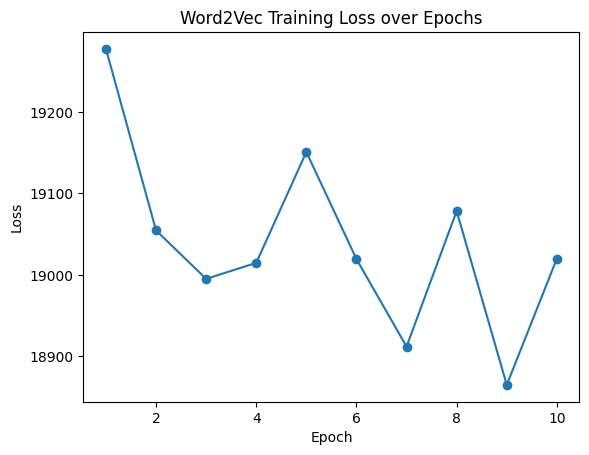

In [63]:
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Word2Vec Training Loss over Epochs")
plt.show()

In [61]:
losses

[2011.00830078125,
 1969.006591796875,
 1990.8055419921875,
 1982.7440185546875,
 1926.5264892578125,
 1851.99658203125,
 2030.193359375,
 2002.616943359375,
 1883.2423095703125,
 1989.1771240234375]

In [48]:
print("Vector for 'alice':\n", model.wv['alice'])
print("\nMost similar to 'alice':\n", model.wv.most_similar('alice'))

Vector for 'alice':
 [ 0.05728053 -0.06177483  0.15357669 -0.06744981  0.12229467 -0.272295
  0.4824093   0.81602144 -0.65332365 -0.06578029 -0.01555251 -0.515104
  0.19012058  0.23147954 -0.21696422  0.44395435  0.313087    0.08022625
 -0.5262455  -0.2562038  -0.00932699  0.39842406  0.36880216 -0.13906409
  0.2696051   0.01339625 -0.09480853  0.14064577 -0.49491668 -0.15381554
  0.16332662  0.17739442 -0.12318288 -0.11795867 -0.3865269   0.508812
  0.721869    0.18245369  0.35194406 -0.38956696  0.60480905  0.03033505
 -0.3253251   0.04669797  0.7266719   0.06101157  0.00870939  0.03123227
  0.34791127  0.08324946]

Most similar to 'alice':
 [('in', 0.9982059001922607), ('the', 0.9980677366256714), ('her', 0.9980123043060303), ('that', 0.9979737997055054), ('was', 0.9979621767997742), ('she', 0.9978180527687073), ('only', 0.9976939558982849), ('herself', 0.9976913332939148), ('there', 0.9976418614387512), ('into', 0.9976047873497009)]


In [49]:
dat = []
for i in range(2, len(data1) - 2):
    context = [data1[i - 2], data1[i - 1], data1[i + 1], data1[i + 2]]
    target = data1[i]
    dat.append((context, target))

In [50]:
dat

[(['alice', 'who', 'only', 'twenty'], 'was'),
 (['who', 'was', 'twenty', 'three'], 'only'),
 (['was', 'only', 'three', 'in'], 'twenty'),
 (['only', 'twenty', 'in', 'this'], 'three'),
 (['twenty', 'three', 'this', 'telling'], 'in'),
 (['three', 'in', 'telling', 'opened'], 'this'),
 (['in', 'this', 'opened', 'the'], 'telling'),
 (['this', 'telling', 'the', 'curious'], 'opened'),
 (['telling', 'opened', 'curious', 'little'], 'the'),
 (['opened', 'the', 'little', 'door'], 'curious'),
 (['the', 'curious', 'door', 'with'], 'little'),
 (['curious', 'little', 'with', 'a'], 'door'),
 (['little', 'door', 'a', 'mixture'], 'with'),
 (['door', 'with', 'mixture', 'of'], 'a'),
 (['with', 'a', 'of', 'excitement'], 'mixture'),
 (['a', 'mixture', 'excitement', 'and'], 'of'),
 (['mixture', 'of', 'and', 'hesitation'], 'excitement'),
 (['of', 'excitement', 'hesitation', 'to'], 'and'),
 (['excitement', 'and', 'to', 'her'], 'hesitation'),
 (['and', 'hesitation', 'her', 'surprise'], 'to'),
 (['hesitation', 't

In [51]:
print("Sample context-target pairs:")
for j in range(3):
    print(f"Context: {dat[j][0]} → Target: {dat[j][1]}")

Sample context-target pairs:
Context: ['alice', 'who', 'only', 'twenty'] → Target: was
Context: ['who', 'was', 'twenty', 'three'] → Target: only
Context: ['was', 'only', 'three', 'in'] → Target: twenty


In [69]:
i = 11
print("Context:", dat[i][0], "Target:", dat[i][1])
print("Model prediction:", model.predict_output_word(dat[i][0]))

Context: ['curious', 'little', 'with', 'a'] Target: door
Model prediction: [('little', 0.38099664), ('door', 0.22429894), ('telling', 0.09980441), ('mixture', 0.093357965), ('curious', 0.061532166), ('excitement', 0.0500401), ('opened', 0.028231297), ('this', 0.00561732), ('hesitation', 0.00514672), ('of', 0.003347021)]


In [68]:
context_words = input("Enter 4 context words (separated by spaces): ").split()

if len(context_words) != 4:
    print("Please enter exactly 4 words.")
else:
    print("Context words:", context_words)

    prediction = model.predict_output_word(context_words)
    print("Model prediction:", prediction)

Enter 4 context words (separated by spaces):  the curious door with


Context words: ['the', 'curious', 'door', 'with']
Model prediction: [('door', 0.2269912), ('little', 0.13871248), ('mixture', 0.09791713), ('excitement', 0.05093475), ('frame', 0.03960161), ('curious', 0.02986615), ('telling', 0.028867366), ('too', 0.025873996), ('opened', 0.021512691), ('against', 0.017265739)]
